In [ ]:
from ablang import AbLang
import torch

model = AbLang("ablang_im")   # or whatever checkpoint you use

AAs = "ACDEFGHIKLMNPQRSTVWY"

# a simple dummy sequence to get logits
vh_seq = "EVQLVESGGGLVQPGGSLRLSCAASGFTFSSYAMHWVRQAPGKGLEWVSAISGSGGSTYYADSVKGRFTISRDNAKNSLYLQMNSLR"

tokenized = model.tokenizer([vh_seq], pad=True, device="cpu")

with torch.no_grad():
    logits = model.AbLang(tokenized)[0]  # shape [seq_len, 20]

# get the first real position logits (skip special tokens)
logit0 = logits[1]  # logits for first amino acid
print("First position logits:", logit0)

# check which amino acid has the highest score for the known first residue
first_res = vh_seq[0]  # e.g., 'E'
print(f"First residue is {first_res}")
best_idx = torch.argmax(logit0).item()
print(f"Best scoring index: {best_idx}, interpreted as {AAs[best_idx]}")



ModuleNotFoundError: No module named 'ablang'

In [1]:
from huggingface_hub import snapshot_download
snapshot_download("NaturalAntibody/nanoBERT")


/home/eva/miniconda3/envs/efficient-evolution/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Fetching 12 files: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]


'/home/eva/.cache/huggingface/hub/models--NaturalAntibody--nanoBERT/snapshots/edc8182ad89a827f8737fa572c6b5fac6197e6b0'

In [3]:
from transformers import pipeline, RobertaTokenizer, AutoModelForMaskedLM
tokenizer = RobertaTokenizer.from_pretrained("NaturalAntibody/nanoBERT")


In [1]:
from pyrosetta import *
init()
pose = pose_from_pdb("/home/eva/0_point_mutation/pdbs/Caplacizumab.pdb")
for i in range(1, pose.total_residue() + 1):
    print(i, pose.residue(i).name1(), chr(pose.residue(i).chain()))


┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2025 [Rosetta PyRosetta4.Release.python310.ubuntu 2025.13+release.80dd00bc09d2543ce4b9a50f13c49219ee5cdd3b 2025-03-27T08:32:50] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python310.ubuntu r396 2025.13+release.80dd00bc09 80dd00bc09

Test lm_design_worker.py with one sequence

In [ ]:
python lm_design_worker.py Caplacizumab EVQLVESGGGLVQPGGSLRLSCAASGRTFSYNPMGWFRQAPGKGRELVAAISRTGGSTYYPDSVEGRFTISRDNAKRMVYLQMNSLRAEDTAVYYCAAAGVRAEDGRVRTLPSEYTFWGQGTQVTVSS NA Nanobody

In [1]:
import psutil

mem = psutil.virtual_memory()
print(f"[DEBUG] Total RAM: {mem.total / 1e9:.2f} GB")
print(f"[DEBUG] Available RAM: {mem.available / 1e9:.2f} GB")
print(f"[DEBUG] Used RAM: {mem.used / 1e9:.2f} GB ({mem.percent}%)")


[DEBUG] Total RAM: 8.25 GB
[DEBUG] Available RAM: 4.61 GB
[DEBUG] Used RAM: 3.39 GB (44.1%)


When programmed is killed for no space

In [ ]:
#1. Turn off existing swap:
sudo swapoff -v /swapfile
#2. Remove the old swap file:
sudo rm /swapfile
#3. Create a new swap file with 8GB size:
sudo fallocate -l 8G /swapfile
#4. Set the correct permissions:
sudo chmod 600 /swapfile
#5. Make the file a swap file:
sudo mkswap /swapfile
#6. Enable the swap file:
sudo swapon /swapfile
free -h 

In [1]:
from Bio.PDB import PDBParser, PPBuilder

parser = PDBParser(QUIET=True)
structure = parser.get_structure("Rimteravimab", "/home/eva/0_point_mutation/pdbs/Rimteravimab.pdb")

ppb = PPBuilder()
for pp in ppb.build_peptides(structure):
    print("Length:", len(pp))
    print("Sequence:", pp.get_sequence())


Length: 125
Sequence: DVQLVESGGGLVQPGGSLRLSCAASGRTFSEYAMGWFRQAPGKEREFVATISWSGGATYYTDSVKGRFTISRDNAKNTVYLQMNSLRPEDTAVYYCAAAGLGTVVSEWDYDYDYWGQGTLVTVSS


/tmp/ipykernel_85109/2199783317.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Mutation (mt)", bbox_to_anchor=(1.05, 1), loc='upper left')


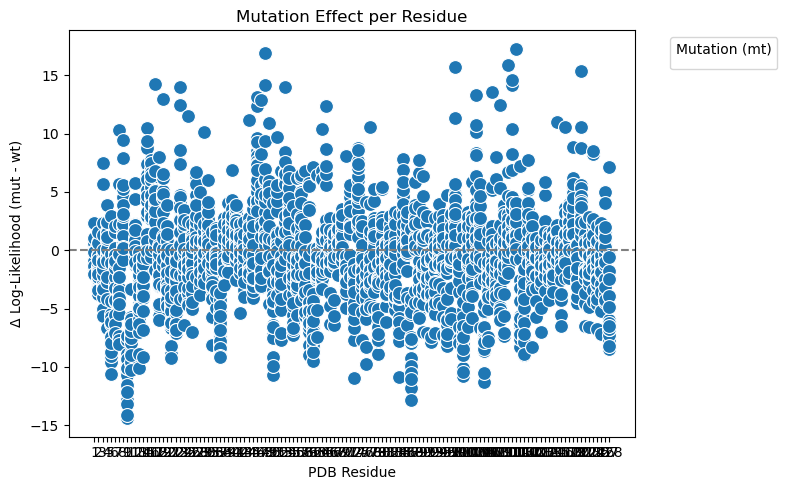

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取 CSV 或直接创建 DataFrame（你可以替换为 pd.read_csv("your_file.csv")）
data = pd.read_csv("/home/eva/0_point_mutation/results/lmdesign/Caplacizumab_point_mutation_scan.csv")

# 快速绘图
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=data,
    x="pdb_residue",
    y="delta_log_likelihood_lm_design",
    s=100,
)

plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("PDB Residue")
plt.ylabel("Δ Log-Likelihood (mut - wt)")
plt.title("Mutation Effect per Residue")
plt.legend(title="Mutation (mt)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
